Import Library

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

Membaca Data

In [18]:
train_df = pd.read_csv('lottery_train.csv', index_col=0)
test_df = pd.read_csv('lottery_test.csv', index_col=0)

Memisahkan Kolom untuk Fitur dan Target

In [19]:
feature_cols = [c for c in train_df.columns if 'last' in c or 'sin' in c or 'cos' in c]
target_cols = [c for c in train_df.columns if 'num_' in c]

Membungkus fitur dan target

In [20]:
X_train = train_df[feature_cols]
y_train = train_df[target_cols]

X_test = test_df[feature_cols]
y_test = test_df[target_cols]

print(f"Training Data: {X_train.shape}")
print(f"Testing Data: {X_test.shape}")

Training Data: (4014, 102)
Testing Data: (265, 102)


Melatih Model Random Forest

In [21]:
rf_model = RandomForestClassifier(n_estimators=200, 
                                  min_samples_split=10, 
                                  random_state=42, 
                                  n_jobs=-1)

rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
def get_top_6_predictions(model, X_input):
    probs_list = model.predict_proba(X_input)
    
    probs_matrix = np.array([prob[:, 1] for prob in probs_list]).T
    top_6_indices = np.argsort(probs_matrix, axis=1)[:, -6:][:, ::-1]
    
    top_6_balls = top_6_indices + 1
    
    return top_6_balls

preds_top_6 = get_top_6_predictions(rf_model, X_test)
print(preds_top_6[:5])

[[19  8 11 41 24 49]
 [ 8 19 24 37 11 41]
 [ 8 20 19 46 24 16]
 [24 18  8 19 46 49]
 [19 24  8 18 42 28]]


Evaluasi Model Random Forest Menghitung Rata-rata Angka yang Ditebak 

Rata-rata tebakan benar per undian: 0.8038 dari 6 angka
Maksimal tebakan benar: 3


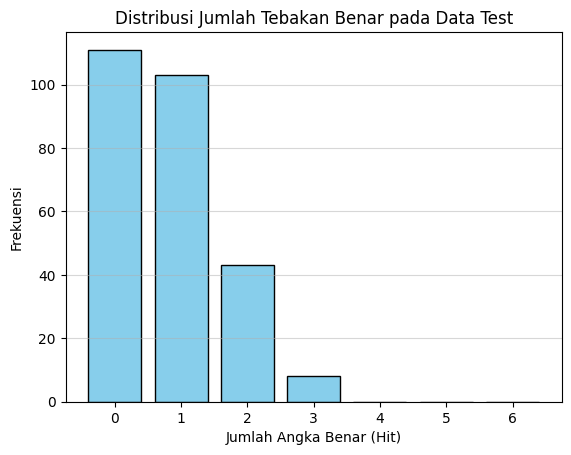

In [23]:
def evaluate_hit_rate(y_true, y_pred_top_6):
    hits_list = []

    # y_true_indices = y_true.apply(lambda row: row.index[row == 1].tolist(), axis=1)

    actual_balls = []
    for row in y_true.values:
        indices = np.where(row == 1)[0] + 1 
        actual_balls.append(indices)
    
    for actual, pred in zip(actual_balls, y_pred_top_6):
        hit_count = len(set(actual).intersection(set(pred)))
        hits_list.append(hit_count)
    
    return np.mean(hits_list), hits_list

mean_hits, all_hits = evaluate_hit_rate(y_test, preds_top_6)

print(f"Rata-rata tebakan benar per undian: {mean_hits:.4f} dari 6 angka")
print(f"Maksimal tebakan benar: {max(all_hits)}")

plt.hist(all_hits, bins=range(8), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.title("Distribusi Jumlah Tebakan Benar pada Data Test")
plt.xlabel("Jumlah Angka Benar (Hit)")
plt.ylabel("Frekuensi")
plt.xticks(range(7))
plt.grid(axis='y', alpha=0.5)
plt.show()

Feautures Important

C:\Users\M S I\AppData\Local\Temp\ipykernel_19600\2593026263.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=fi_df.head(6), palette='viridis', legend='False')


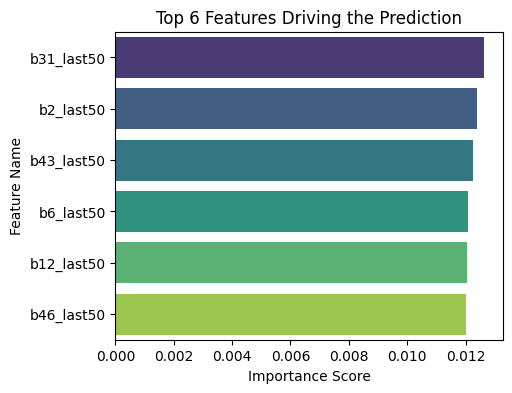

In [24]:
import seaborn as sns

importances = rf_model.feature_importances_
feature_names = X_train.columns

fi_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
fi_df = fi_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(5, 4))
sns.barplot(x='importance', y='feature', data=fi_df.head(6), palette='viridis', legend='False')
plt.title('Top 6 Features Driving the Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.show()

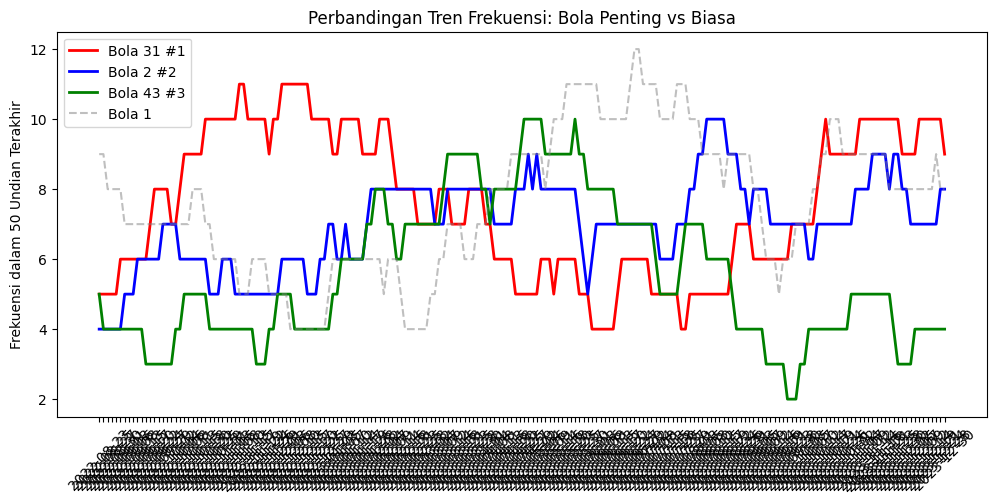

In [25]:
plt.figure(figsize=(12, 5))

subset = X_train.iloc[-200:]

plt.plot(subset.index, subset['b31_last50'], label='Bola 31 #1', color='red', linewidth=2)
plt.plot(subset.index, subset['b2_last50'], label='Bola 2 #2', color='blue', linewidth=2)
plt.plot(subset.index, subset['b43_last50'], label='Bola 43 #3', color='green', linewidth=2)
plt.plot(subset.index, subset['b1_last50'], label='Bola 1', color='gray', linestyle='--', alpha=0.5)
plt.legend()
plt.title("Perbandingan Tren Frekuensi: Bola Penting vs Biasa")
plt.ylabel("Frekuensi dalam 50 Undian Terakhir")
plt.xticks(rotation=45)
plt.show()

In [26]:
import joblib

joblib.dump(rf_model, 'lottery_model.pkl')
joblib.dump(feature_cols, 'model_features.pkl')

['model_features.pkl']